## Sentimental Analysis of Restaurant Reviews

Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures. Mostly, restaurant owners face a lot of difficulties to improve their productivity. This project really helps those who want to increase their productivity, which in turn increases their business profits. This is the main objective of this project.

What the project does is that the restaurant owner gets to know about drawbacks of his restaurant such as most disliked food items of his restaurant by customer’s text review which is processed with ML classification algorithm(Naive Bayes)

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment.

Dataset: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which consists of above 1000 reviews on a restaurant.

To build a model to predict if review is positive or negative, following steps are performed.

- Importing Dataset
- Preprocessing Dataset
- Vectorization
- Training and Classification
- Analysis Conclusion


Tools & Technologies used :-
- NLTK
- Machine Learning
- Python
- Tkinter/Flask
- MySql
- Pandas

In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df=pd.read_csv('r_data (1).tsv', delimiter='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1386, 2)

In [5]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(373)

In [8]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
df.shape

(1013, 2)

In [10]:
# total 1013 reviews are available

In [11]:
# review >> X
# liked >> y >> target variable

In [12]:
# EDA
df['Liked'].value_counts()

Liked
1    510
0    503
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

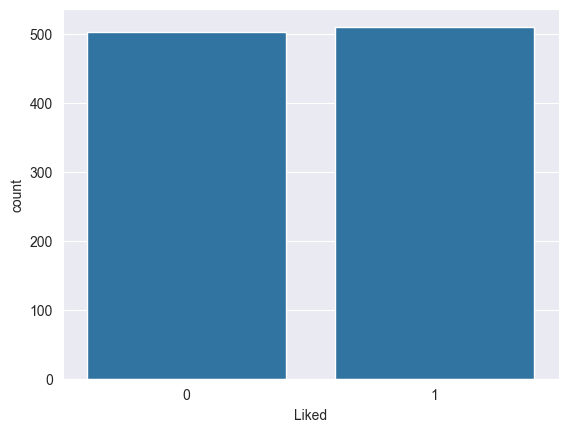

In [14]:
sns.countplot(x=df['Liked'])

In [15]:
# data is balanced

In [16]:
df['Review']

0                                Wow... Loved this place.
1                                      Crust is not good.
2               Not tasty and the texture was just nasty.
3       Stopped by during the late May bank holiday of...
4       The selection on the menu was great and so wer...
                              ...                        
1008                                           unpleasant
1009                                                nasty
1010                                              harmful
1011                                                 less
1012                                                clean
Name: Review, Length: 1013, dtype: object

In [18]:
# text cleaning

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

Steps for cleaning :-
- remove special character or digits
- string is converted into lower case
- tokenization >> split text >> 
- remove stopwords
- stemming >> to get root word

In [27]:
s_list=stopwords.words('english')
s_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
corpus=[]
for i in df['Review']:
    # remove special character or digit
    my_str = re.sub(r'[^A-za-z\s]', '', i)
    my_str=my_str.lower()
    # tokenization
    list1 = my_str.split()
    # remove stopwords
    list2=[i for i in list1 if i not in s_list]
    # stemming
    ps=PorterStemmer()
    list3=[ps.stem(i) for i in list2]
    final_str=' '.join(list3)
    corpus.append(final_str)

In [31]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'foun

### Vectorization
- From the cleaned dataset, potential features are extracted and are converted to numerical format. 
- The vectorization techniques are used to convert textual data to numerical format. 
- Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y=df['Liked']

In [36]:
X.shape

(1013, 1612)

In [37]:
cv.get_feature_names_out()

array(['absolut', 'absolutley', 'accid', ..., 'yum', 'yummi', 'zero'],
      dtype=object)

In [38]:
import pickle
with open('cv_rest', 'wb') as f:
    pickle.dump(cv, f)

In [39]:
# Scaling

In [40]:
# Multinomial NB

Training and Classification
Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.

Classification Algorithms:

Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.

- Multinomial Naive Bayes
- Bernoulli Naive Bayes
- Logistic Regression

In [80]:
# Splitting the dataset into the Training set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [81]:
# model training

In [84]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=0.1)
clf.fit(X_train ,y_train)

MultinomialNB(alpha=0.1)

In [85]:
clf.score(X_test, y_test)

0.8078817733990148

In [86]:
y_pred = clf.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [88]:
confusion_matrix(y_test, y_pred)

array([[84, 18],
       [21, 80]])

In [89]:
accuracy_score(y_test, y_pred)

0.8078817733990148

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       102
           1       0.82      0.79      0.80       101

    accuracy                           0.81       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.81      0.81       203



Text(50.722222222222214, 0.5, 'Predicted')

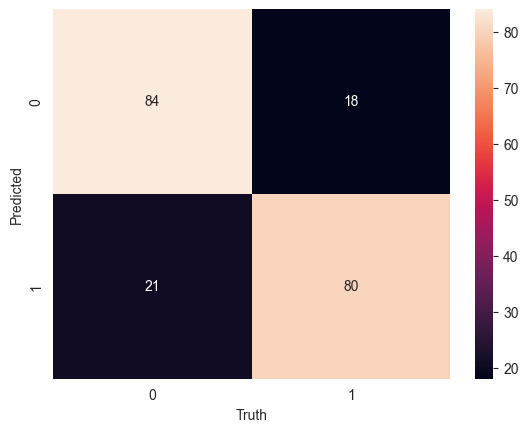

In [92]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [93]:
with open('model_rest', 'wb') as f:
    pickle.dump(clf, f)

In [104]:
a=['not bad test']

In [106]:
a_sc=cv.transform(a)

In [108]:
result=clf.predict(a_sc)

In [109]:
a='not bad'
b=[a]
a_sc=cv.transform(b).toarray()
result=clf.predict(a_sc)
result

array([0])

In [110]:
if 'not' in a:
    result[0] = abs(result[0]-1)
print(result[0])

1


In [114]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
clf2=BernoulliNB(alpha=1.0)
clf2.fit(X_train, y_train)

BernoulliNB()

In [115]:
clf2.score(X_test, y_test)

0.7980295566502463

In [116]:
y_pred=clf2.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [118]:
confusion_matrix(y_test, y_pred)

array([[77, 25],
       [16, 85]])

In [119]:
accuracy_score(y_test, y_pred)

0.7980295566502463

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       102
           1       0.77      0.84      0.81       101

    accuracy                           0.80       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.80      0.80      0.80       203



In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.

Evaluation metrics used here are accuracy, precision and recall.


    Using Multinomial Naive Bayes,
    Accuracy of prediction is 80.78%.
    Precision of prediction is 0.80.
    Recall of prediction is 8.81.